# US Accent Recognition
# Mohammad MUTTAQI - 17050241030

Importing necessary libraries:

In [36]:
import time
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import RBF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier

Importing the data set and pre-processing:

In [16]:
df = pd.read_csv('accent_dataset.csv')
df.language = [1 if var == "US" else 0 for var in df.language]
X = df.drop(columns=['language'])
y = df['language'].values

# Logistic Regression

Compiling and training the model:

In [17]:
# Logistic Regression with k-Fold
# k = 5, C = 0.04
# The best accuracy result is 78.1%,   standard deviation = 3.9%,   Computation Time = 2.29s

start = time.time()
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression(C=0.04)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
end = time.time()
total_time = end - start
print('Accuracy = %.3f \nStandard deviation = (%.3f)' % (mean(scores), std(scores)))
print("Computation Time = "+ str(total_time))

Accuracy = 0.781 
Standard deviation = (0.039)
Computation Time = 2.4933295249938965


Calculating the precision:

In [18]:
# Precision
# k = 5, C = 0.04
# Precision => 81.0%

cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression(C=0.04)
scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('Precision = %.3f' % (mean(scores)))

Precision = 0.810


Calculating the recall:

In [19]:
# Recall
# k = 5, C = 0.04
# Recall => 73.9%

cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression(C=0.04)
scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall = %.3f' % (mean(scores)))

Recall = 0.739


Calculating the f1 score:

In [20]:
# f1 score
# k = 5, C = 0.04
# f1 score => 77.2%

cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression(C=0.04)
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1 score = %.3f' % (mean(scores)))

f1 score = 0.772


# Parameter optimization (LR)

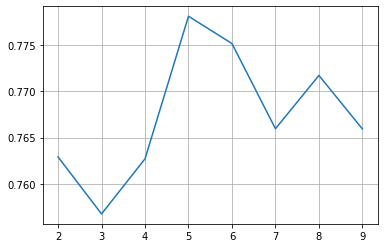

In [21]:
# Finding the best number of folds
# The best number of folds was found to be 5

cv_range = range(2, 10)
cv_scores = []

for k in cv_range:
    cv = KFold(n_splits=k, random_state=1, shuffle=True)
    model = LogisticRegression(C=0.03)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    cv_scores.append(scores.mean())

#k_scores
sn.lineplot(x = cv_range, y = cv_scores);
plt.grid()

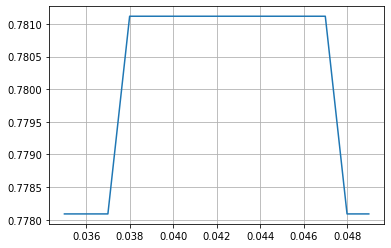

In [24]:
# Finding the best C value
c_range = np.arange(0.035, 0.05, 0.001)
c_scores = []

for c in np.arange(0.035, 0.05, 0.001):
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    model = LogisticRegression(C=c)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    c_scores.append(scores.mean())

#k_scores
sn.lineplot(x = c_range, y = c_scores);
plt.grid()

# RBF

Compiling and training the model:

In [26]:
# RBF with k-Fold
# k = 10, sigma = 1
# The best accuracy result is 88.2%,   standard deviation = 5.5%,   Computation Time = 7.13s

start = time.time()
kernel = 1.0 * RBF(1.0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianProcessClassifier(kernel=kernel, random_state=0)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
end = time.time()
total_time = end - start
print('Accuracy = %.3f \nStandard deviation = (%.3f)' % (mean(scores), std(scores)))
print("Computation Time = "+ str(total_time))

Accuracy = 0.882 
Standard deviation = (0.055)
Computation Time = 4.490983724594116


Calculating the precision:

In [27]:
# Precision
# k = 10, sigma = 1
# Precision => 89.3%

kernel = 1.0 * RBF(1.0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianProcessClassifier(kernel=kernel, random_state=0)
scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('Precision = %.3f' % (mean(scores)))

Precision = 0.893


Calculating the recall:

In [28]:
# Recall
# k = 10, sigma = 1
# Recall => 86.7%

kernel = 1.0 * RBF(1.0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianProcessClassifier(kernel=kernel, random_state=0)
scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
print('Recall = %.3f' % (mean(scores)))

Recall = 0.867


Calculating the f1 score:

In [29]:
# f1 score
# k = 10, sigma = 1
# f1 score => 87.7%

kernel = 1.0 * RBF(1.0)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianProcessClassifier(kernel=kernel, random_state=0)
scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
print('f1 score = %.3f' % (mean(scores)))

f1 score = 0.877


# Parameter optimization (RBF)

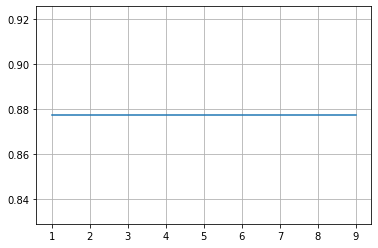

In [31]:
# Finding the best parameters

cv_range = range(1, 10)
cv_scores = []

for k in cv_range:
    
    kernel = k * RBF(k)
    gpc = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X, y)
    
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    model = GaussianProcessClassifier(kernel=kernel, random_state=0)
    cores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    cv_scores.append(scores.mean())

#k_scores
sn.lineplot(x = cv_range, y = cv_scores);
plt.grid()

# k-NN

Compiling and training the model:

In [37]:
# applying k-Fold with k-NN for k = 16 and NN = 5
# Accuracy = 0.881, Standard deviation = 0.062, Computation Time = 0.122s

start = time.time()
knn = KNeighborsClassifier(n_neighbors= 5)
cv = KFold(n_splits=8, random_state=1, shuffle=True)
scores = cross_val_score(knn, X, y , cv = cv, scoring= 'accuracy')
end = time.time()
total_time = end - start
print('Accuracy = %.3f \nStandard deviation = %.3f' % (mean(scores), std(scores)))
print("Computation Time = "+ str(round(total_time, 3))+'s')

Accuracy = 0.878 
Standard deviation = 0.064
Computation Time = 0.067s


Calculating the precision:

In [38]:
# Precision
# applying k-Fold with k-NN for k = 16 and NN = 5
# Precision => 91.6%

knn = KNeighborsClassifier(n_neighbors= 5)
cv = KFold(n_splits=16, random_state=1, shuffle=True)
scores = cross_val_score(knn, X, y , cv = cv, scoring= 'precision')
print('Precision = %.3f' % (mean(scores)))

Precision = 0.916


Calculating the recall:

In [39]:
# Recall
# applying k-Fold with k-NN for k = 16 and NN = 5
# Recall => 85.3%

knn = KNeighborsClassifier(n_neighbors= 5)
cv = KFold(n_splits=16, random_state=1, shuffle=True)
scores = cross_val_score(knn, X, y , cv = cv, scoring= 'recall')
print('Recall = %.3f' % (mean(scores)))

Recall = 0.853


Calculating the f1 score:

In [40]:
# f1 score
# applying k-Fold with k-NN for k = 16 and NN = 5
# f1 score => 87.7%

knn = KNeighborsClassifier(n_neighbors= 5)
cv = KFold(n_splits=16, random_state=1, shuffle=True)
scores = cross_val_score(knn, X, y , cv = cv, scoring= 'f1')
print('f1 score = %.3f' % (mean(scores)))

f1 score = 0.877


# Parameter optimization (k-NN)

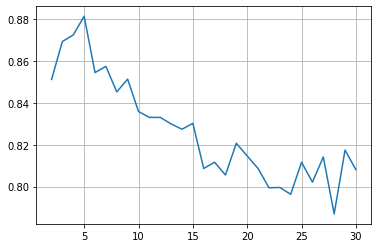

In [41]:
# finding the best NN value
k_range = range(2, 31)
k_scores = []

for k in k_range:
  cv = KFold(n_splits=16, random_state=1, shuffle=True)
  model = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  k_scores.append(scores.mean())

#k_scores
sn.lineplot(x = k_range, y = k_scores);
plt.grid()

# SVM (Linear)

Compiling and training the model:

In [32]:
# Applying SVM (Linear kernel) with k-fold cross validation 
# C = 2, k = 4
# The accuracy result was ==> 77.5%
# standard deviation = 4%
# calculating computation time ==> 0.1s

# k-fold cross validation for SVM(Linear)
start = time.time()
svc_linear_folded = SVC(C=2, kernel = 'linear')
cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(svc_linear_folded, X, y , cv = cv, scoring= 'accuracy')
end = time.time()
total_time = end - start
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("Computation Time = "+ str(total_time))

Accuracy: 0.775 (0.041)
Computation Time = 0.09574198722839355


Calculating the precision:

In [33]:
# Precision 
# C = 3, cv = 3
# Precision ==> 81.8%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
svc_linear_folded = SVC(C=2, kernel = 'linear')
scores = cross_val_score(svc_linear_folded, X, y , cv = cv, scoring= 'precision')
print('Precision: %.3f' % (mean(scores)))

Precision: 0.818


Calculating the recall:

In [34]:
# Recall 
# C = 3, cv = 3
# Recall ==> 71.9%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
svc_linear_folded = SVC(C=2, kernel = 'linear')
scores = cross_val_score(svc_linear_folded, X, y , cv = cv, scoring= 'recall')
print('Recall: %.3f' % (mean(scores)))

Recall: 0.719


Calculating the f1 score:

In [35]:
# f1 score
# C = 3, cv = 3
# f1 score ==> 76.0%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
svc_linear_folded = SVC(C=2, kernel = 'linear')
scores = cross_val_score(svc_linear_folded, X, y , cv = cv, scoring= 'f1')
print('f1 score: %.3f' % (mean(scores)))

f1 score: 0.760


# SVM (Polynomial)

Compiling and training the model:

In [3]:
# applying k-Fold cross validation for SVM(Polynomial)
# C = 17, degree = 5, k = 4, Accuracy ==> 88.1%, Standard deviation ==> 2.4%
# Computation time = 0.035s
start = time.time()
cv = KFold(n_splits=4, random_state=1, shuffle=True)
svc_poly_folded = SVC(C=17, kernel='poly', degree=5)
scores = cross_val_score(svc_poly_folded, X, y , cv = cv, scoring= 'accuracy')
end = time.time()
total_time = end - start
print('Accuracy = %.3f \nStandard deviation = %.3f' % (mean(scores), std(scores)))
print("Computation Time = "+ str(total_time))

Accuracy = 0.881 
Standard deviation = 0.024
Computation Time = 0.057845115661621094


Calculating the precision:

In [4]:
# Precision
# C = 17, degree = 5, k = 4, 
# Precision ==> 92.5%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
svc_poly_folded = SVC(C=17, kernel='poly', degree=5)
scores = cross_val_score(svc_poly_folded, X, y , cv = cv, scoring= 'precision')
print('Precision = %.3f' % (mean(scores)))

Precision = 0.925


Calculating the recall:

In [5]:
# Recall
# C = 17, degree = 5, k = 4, 
# Recall ==> 83.1%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
svc_poly_folded = SVC(C=17, kernel='poly', degree=5)
scores = cross_val_score(svc_poly_folded, X, y , cv = cv, scoring= 'recall')
print('Recall = %.3f' % (mean(scores)))

Recall = 0.831


Calculating the f1 score:

In [6]:
# f1 score
# C = 17, degree = 5, k = 4
# f1 score ==> 87.5%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
svc_poly_folded = SVC(C=17, kernel='poly', degree=5)
scores = cross_val_score(svc_poly_folded, X, y , cv = cv, scoring= 'f1')
print('f1 score = %.3f' % (mean(scores)))

f1 score = 0.875


# Parameter optimization (SVM (PLY))

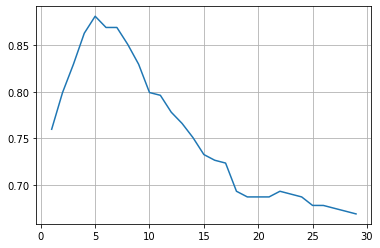

In [7]:
# Finding the best degree value
d_range = range(1, 30)
d_scores = []

for k in d_range:
  svc_poly_folded = SVC(kernel='poly', degree=k, C=17)
  cv = KFold(n_splits=4, random_state=1, shuffle=True)
  scores = cross_val_score(svc_poly_folded, X, y , cv = cv, scoring= 'accuracy')
  d_scores.append(scores.mean())

#k_scores
sn.lineplot(x = d_range, y = d_scores);
plt.grid()

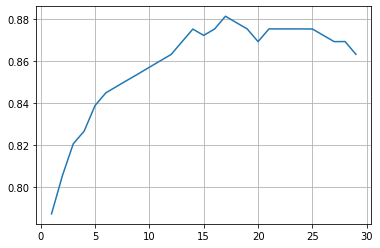

In [8]:
# Finding the best C value
c_range = range(1, 30)
c_scores = []

for k in c_range:
  svc_poly_folded = SVC(C=k, kernel='poly', degree=5)
  cv = KFold(n_splits=4, random_state=1, shuffle=True)
  scores = cross_val_score(svc_poly_folded, X, y , cv = cv, scoring= 'accuracy')
  c_scores.append(scores.mean())

#k_scores
sn.lineplot(x = c_range, y = c_scores);
plt.grid()

# SVM (RBF)

Compiling and training the model:

In [9]:
# Gaussian Kernel (RBF)
# C = 6.0, gamma = 0.03, k = 4, Accuracy ==> 89.4%, Standard deviation ==> 3.5%
# Computation time = 0.063s

start = time.time()
svclassifier = SVC(C=5, kernel='rbf', gamma=0.03)
cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(svclassifier, X, y , cv = cv, scoring= 'accuracy')
end = time.time()
total_time = end - start
print('Accuracy = %.3f \nStandard deviation = %.3f' % (mean(scores), std(scores)))
print("Computation Time = "+ str(total_time))

Accuracy = 0.894 
Standard deviation = 0.032
Computation Time = 0.04691147804260254


Calculating the precision:

In [10]:
# Precision
# C = 6.0, gamma = 0.03, k = 4
# Precision = 90.1%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(svclassifier, X, y , cv = cv, scoring= 'precision')
print('Precision = %.3f' % (mean(scores)))

Precision = 0.902


Calculating the recall:

In [11]:
# Recall
# C = 6.0, gamma = 0.03, k = 4
# Recall = 88.7%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(svclassifier, X, y , cv = cv, scoring= 'recall')
print('Recall = %.3f' % (mean(scores)))

Recall = 0.887


Calculating the f1 score:

In [12]:
# f1 score
# C = 6.0, gamma = 0.03, k = 4
# f1 score = 89.2%

cv = KFold(n_splits=4, random_state=1, shuffle=True)
scores = cross_val_score(svclassifier, X, y , cv = cv, scoring= 'f1')
print('f1 score = %.3f' % (mean(scores)))

f1 score = 0.892


# Parameter optimization (SVM (RBF))

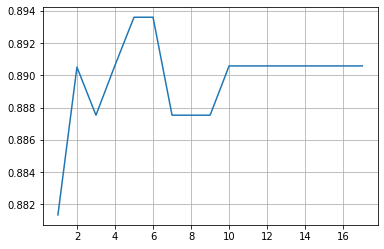

In [13]:
# Finding the best gamma value
g_range = range(1, 18)
g_scores = []

for g in g_range:
  svc_linear_folded = SVC(C=g, kernel='rbf', gamma= 0.03)
  cv = KFold(n_splits=4, random_state=1, shuffle=True)
  scores = cross_val_score(svc_linear_folded, X, y , cv = cv, scoring= 'accuracy')
  g_scores.append(scores.mean())

#k_scores
sn.lineplot(x = g_range, y = g_scores);
plt.grid()

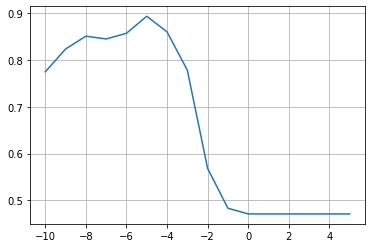

In [14]:
# Finding the best gamma value
g_range = range(-10, 6)
g_scores = []

for g in g_range:
  gma = (2**(g))
  svc_linear_folded = SVC(C=6, kernel='rbf', gamma= gma)
  cv = KFold(n_splits=4, random_state=1, shuffle=True)
  scores = cross_val_score(svc_linear_folded, X, y , cv = cv, scoring= 'accuracy')
  g_scores.append(scores.mean())

#k_scores
sn.lineplot(x = g_range, y = g_scores);
plt.grid()